# Breast Cancer Prediction

###### Breast  Cancer  is  the  most  oftenidentified  cancer among  women  and  major  reason  for  increasing  mortality  rate among  women.  As  the  diagnosis  of  this  disease  manually  takes long  hours and the  lesser  availability  of systems,  there  is  a  need to  develop  the  automatic  diagnosis  system  for  early  detection  of cancer.   Data   mining   techniques   contribute   a   lot   in   the development of such system. For the classification of benign and malignant   tumor   we   have   used   classification   techniques   of machine learning in which the machine is learned from the past data  and  can  predict  the  category  of  new  input. 

## Data Analysis and Machine Learning Model for the data

#### Our aim is to diagnose patients with breast cancer by analyzing the data of patients and categorizing them into two categories:
1. Benign (B)
2. Malignant (M)

#### Libraries Used:

1. pandas 
An open source, BSD-licensed library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.
2. numpy
Fundamental package for scientific computations in Python
3. matplotlib
Matplotlib is a plotting library for the Python programming language
4. sklearn
A machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines,KNeighborsClassifier,LinearSVC

In [33]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.externals import joblib

### Data

# The data was collected from 
https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

columns:

{id,	diagnosis, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se,compactness_se,concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst,	perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst }


1.id:ID number


2. diagnosis:The diagnosis of breast tissues (M = malignant, B = benign)


3. radius_mean:mean of distances from center to points on the perimeter


4. texture_mean:standard deviation of gray-scale values


5. perimeter_mean:mean size of the core tumor


6. area_mean:mean area of the core tumor


7. smoothness_mean:mean of local variation in radius lengths


8. compactness_mean:mean of perimeter^2 / area - 1.0


9. concavity_mean:mean of severity of concave portions of the contour


10. concave points_mean:mean for number of concave portions of the contour


11. symmetry_mean:mean symmetry


12. fractal_dimension_mean:mean for "coastline approximation" - 1


13. radius_se:standard error for the mean of distances from center to points on the perimeter


14. texture_se:standard error for standard deviation of gray-scale values


15. perimeter_se


16. area_se


17. smoothness_se:standard error for local variation in radius lengths


18. compactness_se:standard error for perimeter^2 / area - 1.0


19. concavity_se:standard error for severity of concave portions of the contour


20. concave points_se:standard error for number of concave portions of the contour


21. symmetry_se


22. fractal_dimension_se:standard error for "coastline approximation" - 1


23. radius_worst:"worst" or largest mean value for mean of distances from center to points on the perimeter


24. texture_worst:"worst" or largest mean value for standard deviation of gray-scale values


25. perimeter_worst


26. area_worst


27. smoothness_worst:"worst" or largest mean value for local variation in radius lengths


28. compactness_worst:"worst" or largest mean value for perimeter^2 / area - 1.0


29. concavity_worst:"worst" or largest mean value for severity of concave portions of the contour


30. concave points_worst:"worst" or largest mean value for number of concave portions of the contour


31. symmetry_worst


32. fractal_dimension_worst:"worst" or largest mean value for "coastline approximation" - 1

In [34]:
#Loading the data and setting the values for X(non-class attributes) and y(target variable)
dataset=pd.read_csv('/home/manaswi/Desktop/data.csv')
print("Cancer data set dimensions : {}".format(dataset.shape))
X = dataset.iloc[:, 2:32].values
y = dataset.iloc[:, 1].values


Cancer data set dimensions : (569, 33)


In [35]:
#To view a random sample for the dataset
dataset.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
341,898143,B,9.606,16.84,61.64,280.5,0.08481,0.09228,0.08422,0.02292,...,23.07,71.25,353.6,0.1233,0.3416,0.4341,0.0812,0.2982,0.09825,NaN
11,84610002,M,15.780,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,...,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.1810,0.3792,0.10480,NaN
423,906878,B,13.660,19.13,89.46,575.3,0.09057,0.11470,0.09657,0.04812,...,25.50,101.40,708.8,0.1147,0.3167,0.3660,0.1407,0.2744,0.08839,NaN
328,8953902,M,16.270,20.71,106.90,813.7,0.11690,0.13190,0.14780,0.08488,...,30.38,129.80,1121.0,0.1590,0.2947,0.3597,0.1583,0.3103,0.08200,NaN
216,8811523,B,11.890,18.35,77.32,432.2,0.09363,0.11540,0.06636,0.03142,...,27.10,86.20,531.2,0.1405,0.3046,0.2806,0.1138,0.3397,0.08365,NaN


## Data Visualization

Frequency distribution of data in target variable 'diagnosis'

Text(0.5, 1.0, 'Type of cancer vs frequency')

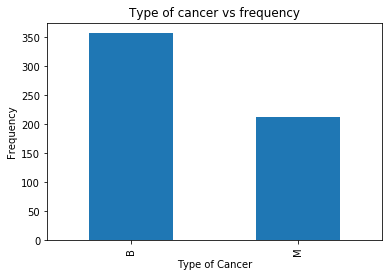

In [36]:
dataset.diagnosis.value_counts().plot(kind='bar')
plt.xlabel('Type of Cancer')
plt.ylabel('Frequency')
plt.title('Type of cancer vs frequency')

Data distribution based on frequency of unique values in the features

## Box plot for all 30 features

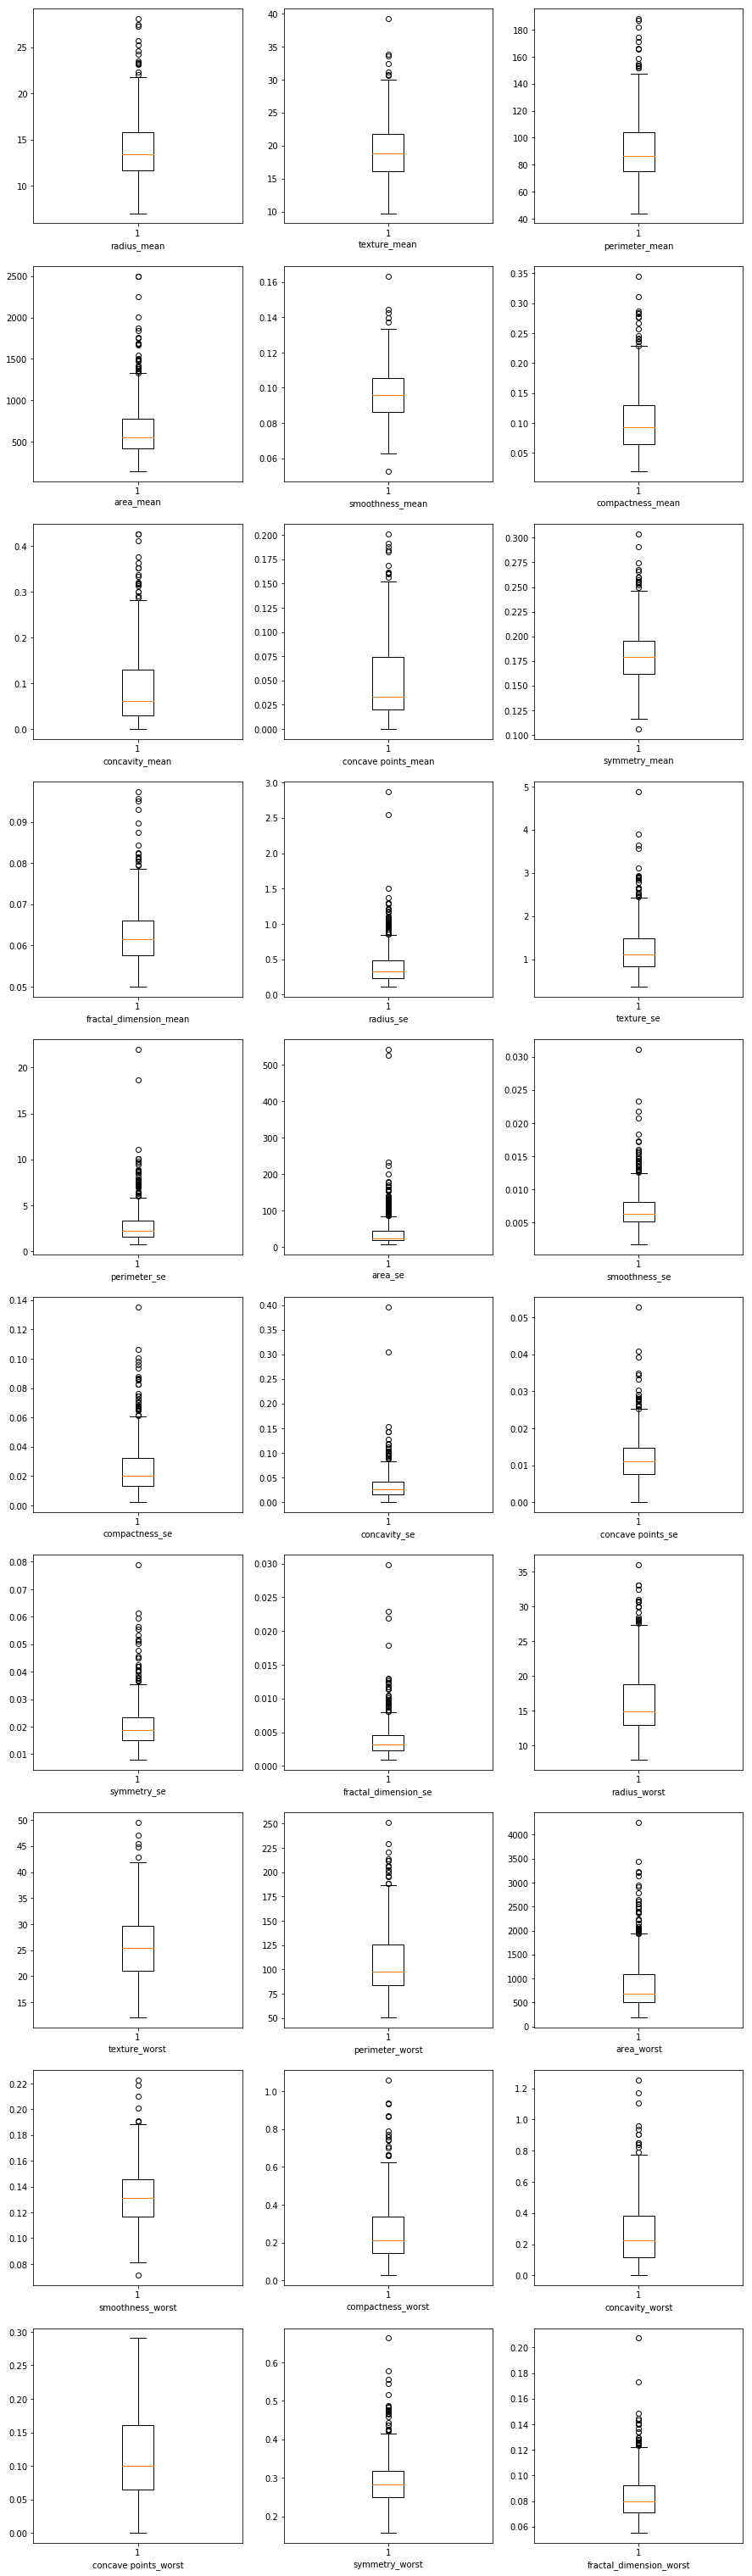

In [37]:
l=dataset.columns
k=2
f,ax=plt.subplots(10,3,figsize=(15,55))
for i in range(10):
    for j in range(3):
        ax[i,j].set_xlabel(l[k])
        ax[i,j].boxplot(dataset[l[k]])
        k+=1
plt.show()

## Histograms for all 30 features

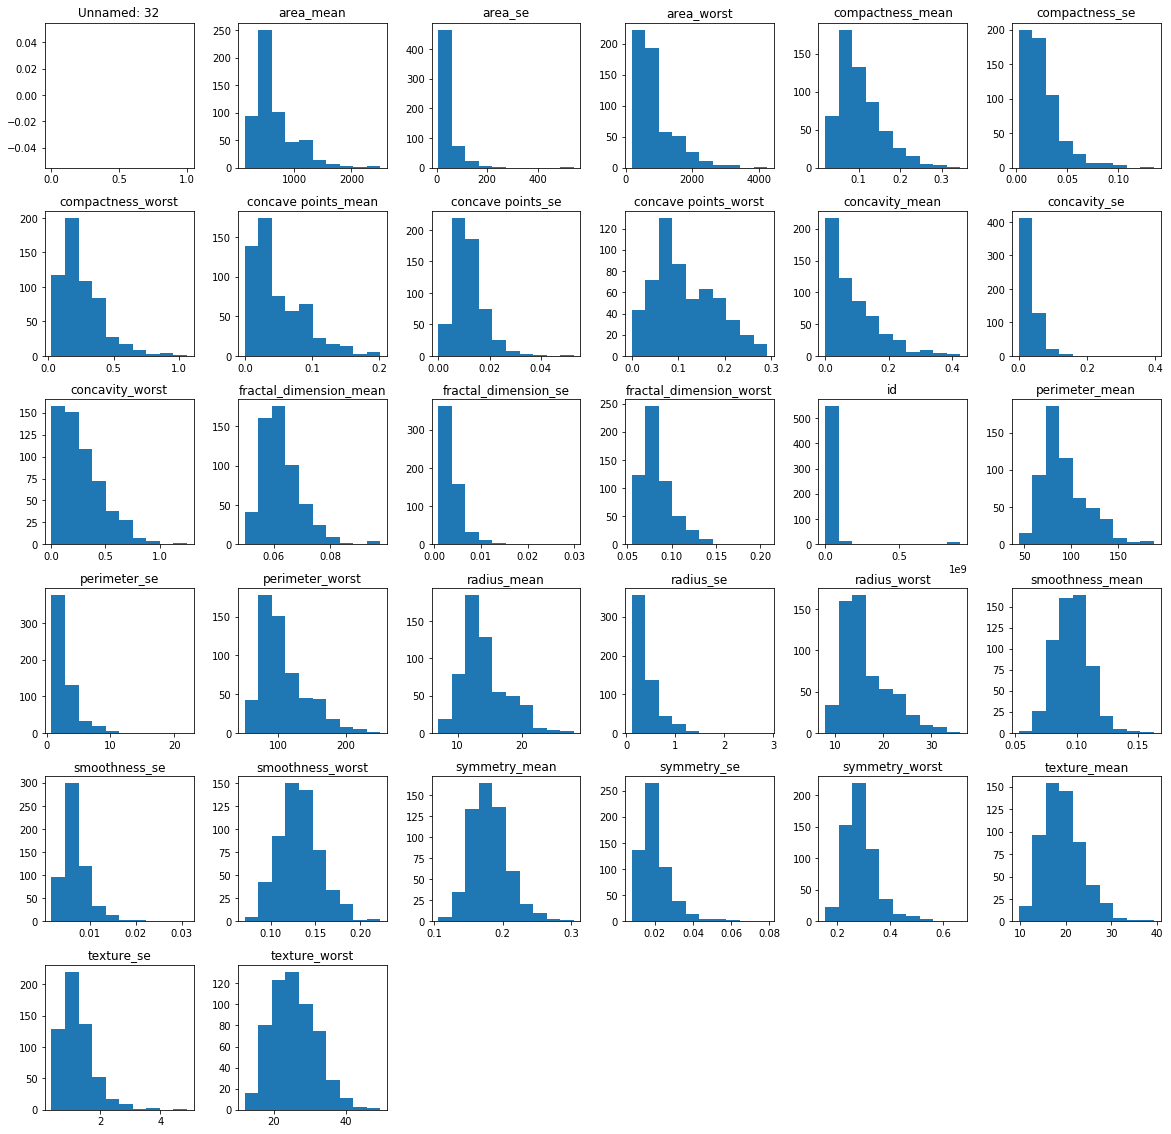

In [38]:
dataset.hist(bins=10,figsize=(20,20),grid=False);

### Checking the presence of missing values

In [39]:
dataset.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

### Checking the presence of duplicate values

In [40]:
dataset.duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
       ...  
539    False
540    False
541    False
542    False
543    False
544    False
545    False
546    False
547    False
548    False
549    False
550    False
551    False
552    False
553    False
554    False
555    False
556    False
557    False
558    False
559    False
560    False
561    False
562    False
563    False
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

### LogisticRegression Model

Logistic  Regression  is  a  supervised  machine  learning technique,  employed  in  classification  jobs  (  for  predictions based on training data).Logistic Regression uses an equation similar  to  Linear  Regression  but  the  outcome  of    logistic regression is  a  categorical  variable  whereas  it  is a  value  for other  regression  models.  Binary  outcomes  can  be  predicted from  the  independent  variables.  The  outcome  of  dependent variable   is   discrete.   Logistic   Regression   uses   a   simple equation   which   shows   the   linear   relation   between   the independent  variables.  These  independent  variables  along with  their  coefficients  are  united  linearly  to  form  a  linear equation that is used to predict the output.
The equation used is:

Ln($\frac{\Pi}{(1-\Pi)}$)=a0+a1*x+a2*x

This is called the logistic function.

This algorithm is entitled as logistic regression as the key method  behind  it  is  logistic  function.The  output  can  be predicted  from  the  independent  variables,  which  form  a linear  equation.  The  output  predicted  has  no  restrictions,  it can be any value from negative infinity to positive infinity.But the output required is a class variable (i.e., yes or no, 1  or  0).  So,  the  outcome  of  the  linear  equation  should  be flattened  into  a  small  range  (i.e  [0,1]).Logistic  function  is used  here  to  suppress  the  outcome  value  between  0  and  1. Logistic  function  can  also  be  called sigmoidfunction  or Cost  function.  Logistic  function  is  a  Shaped  curve  which takes  the  input  (numeric  value)  and  changes  it  to  a  value between 0 and 1[9].Applying  antilog  on  both  sides  of  the  above  equation  gives

y=$\frac{\mathrm{e}^{a0+a1x+a2x}}{(1-\mathrm{e}^{a0+a1x+a2x})}$


## Split into train and test sets

Now we'll use our trained model to generate predictions for our test data. To see how well our model did, we'll calculate the accuracy by comparing our predicted labels for the test set with the true labels in the test set. Accuracy is the number of correct predictions divided by the total number of predictions.

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [42]:
logreg=LogisticRegression()
logreg.fit(X_train,y_train)
y_pred = logreg.predict(X_test)
logreg.score(X_test,y_test)


/home/manaswi/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9649122807017544

The accuracy of the Logistic Regression Model is 0.96491.

### SVM Model

#### SVM is a supervised machine learning algorithm which can be used for classification or regression problems.
1) It uses Kernel trick

2) It is Optimal margin based classification technique in Machine Learning.

3) Good number of algorithms are proposed which utilizes problem structures and other smaller-smaller things like problem shrinking during optimization etc.

Support Vector Machine is a supervised machine learning algorithm which   is   doing   well   in   pattern   recognition problems  and  it  is  used  as a training algorithm  for  studying classification  and  regression  rules  from  data.SVM  is  most precisely  used  when  the  number  of  features  and  number  of instances  are  high.A  binary  classifier  is  built  by  the  SVM algorithm .  This  binary  classifier  is  constructed  using  a hyper plane where it is a line in more than 3-dimensions.The hyper  plane  does  the  work  of  separating  the  members  into one of the two classes.

Hyper plane of SVM is built on mathematical equations.The equation of hyper plane is WTX=0 which is similar to the line equation y= ax + b. Here W and X represent vectors where   the   vector   W   is   always   normal   to   the   hyper plane.WTX  represents  the  dot  product  of  vectors.  As  SVM deals with the dataset when the number of features are more so,  we need to use the equation WTX=0 in this case instead of using the line equation y= ax + b.If a set of training data is given to the machine, each data item   will   be   assigned   to   one   or   the   other   categorical variables,  a  SVM  training  algorithm  builds  a  model  that plots new data item to one or the other category.  In an SVM model,  each  data  item  is  represented  as  points  in  an  n-dimensional  space  where n  is  the number  of  features  where each  feature  is  represented  as  the  value  of  a  particular coordinate  in  the  n-dimensional  space.  Classification  is carried  out  by  finding  a  hyper-plane  that  divides  the  two-classes proficiently. Later, new data item is mapped into the same space and its category is predicted based on the side of the hyper-plane they turn up.

In [49]:
svm=LinearSVC()
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)
svm.score(X_test,y_test)


/home/manaswi/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9532163742690059

### Testing the model

In [44]:
filename= 'svmCancer.sav'
joblib.dump(svm, filename)

['svmCancer.sav']

## RESULTS AND DISCUSSION

SVM  gives  the  highest accuracy when compared to Logistic Regression algorithm. So, we propose that SVM is the best suited algorithm for the prediction   of   Breast   Cancer   Occurrence   with complex datasets.